In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('customers.csv')

In [4]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


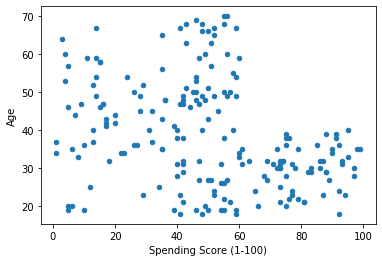

In [23]:
df.plot.scatter(y='Age', x='Spending Score (1-100)')

In [16]:
X1 = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 0))
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

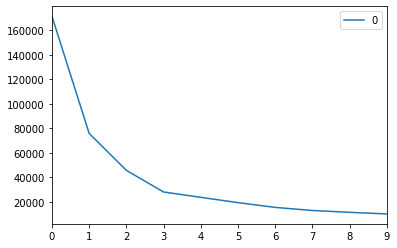

In [17]:
pd.DataFrame(inertia).plot()

In [18]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [19]:
clusters = df[['Age', 'Spending Score (1-100)']]

In [20]:
clusters = clusters.assign(cluster=labels1)

In [21]:
clusters

,Age,Spending Score (1-100),cluster
0,19,39,0
1,21,81,2
2,20,6,1
3,23,77,2
4,31,40,0
5,22,76,2
6,35,6,1
7,23,94,2
8,64,3,1
9,30,72,2


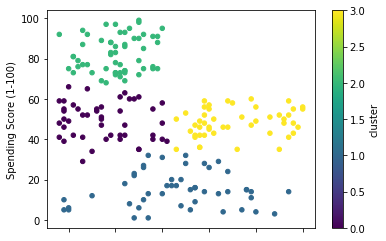

In [22]:
clusters.plot.scatter(x='Age', y='Spending Score (1-100)', c='cluster', colormap='viridis')